In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
normalpath = "drive/MyDrive/VijayV_Persuasion_Strategies_Project/"

Mounted at /content/drive


In [ ]:
#!/usr/bin/env python

import tensorflow as tf
from tensorflow import keras
import os
import random
import numpy as np
import json

from tqdm import tqdm

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.transform import rotate
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

seed = 42
np.random.seed = seed

IMG_WIDTH = 224
IMG_HEIGHT = 224
IMG_CHANNELS = 3




In [ ]:
imagedetectablestrats = ["Active", "Amazed", "Eager", "Fashionable", "Feminine","Cheerful"]

trainimages = {}
testimages = {}

f = open('drive/MyDrive/VijayV_Persuasion_Strategies_Project/annotations_file_train_set.json', 'r')
train_data = json.load(f)
f = open('drive/MyDrive/VijayV_Persuasion_Strategies_Project/annotations_test_set.json', 'r')
test_data = json.load(f)

for i in train_data:
    strategies = []
    strategies.append(train_data[i]['First Persuasion'].split(" ")[0])
    strategies.append(train_data[i]['Second Persuasion'].split(" ")[0])
    strategies.append(train_data[i]['Third Persuasion'].split(" ")[0])
    sids = ""
    for strat in strategies:
      if strat in imagedetectablestrats:
        sids = strat
        break
    if sids!="":
      trainimages.update({i.split("/")[1]:sids})
for i in test_data:
    strategies = []
    strategies.append(test_data[i]['First Persuasion'].split(" ")[0])
    strategies.append(test_data[i]['Second Persuasion'].split(" ")[0])
    strategies.append(test_data[i]['Third Persuasion'].split(" ")[0])
    sids = ""
    for strat in strategies:
      if strat in imagedetectablestrats:
        sids = strat
        break
    if sids!="":
      testimages.update({i.split("/")[1]:sids})
allimages = dict.copy(trainimages)
allimages.update(testimages)

In [ ]:
binary_mask_ids = next(os.walk(normalpath+"binary_masks/"))[2]
image_ids = []
for id_ in binary_mask_ids:
    image_ids.append(id_[5:-4])
print(image_ids)
# for train_id in train_ids:
#     try:
#         print(allimages[train_id+'.jpg'])
#     except:
#         print(allimages[train_id+'.png'])
stratToImageIDList = {}
for strat in imagedetectablestrats:
    stratlist = []
    for image_id in image_ids:
        try:
            imStrat = allimages[image_id+'.jpg']
        except:
            imStrat = allimages[image_id+'.png']
        if imStrat == strat:
            stratlist.append(image_id)
    stratToImageIDList[strat] = stratlist
train_ids = []
test_ids = []
for strat in imagedetectablestrats:
    training_data, testing_data = train_test_split(stratToImageIDList[strat], test_size=0.2, random_state=42)
    train_ids.extend(training_data)
    test_ids.extend(testing_data)
print(len(image_ids))





['15033', '18862', '22263', '49034', '106062', '106993', '109416', '109475', '119741', '123770', '123831', '124174', '125333', '136171', '136509', '138001', '141807', '152775', '152904', '154741', '161130', '173749', '174578', '175704', '4154', '18779', '23780', '31812', '33390', '36075', '37728', '49371', '100536', '106628', '106765', '107013', '110304', '121157', '121446', '123596', '133746', '135987', '137446', '141771', '144811', '149561', '152849', '155283', '159521', '170126', '17706', '22057', '33539', '33640', '37651', '57701', '105778', '106655', '110210', '159907', '159915', '159962', '171670', '175274', '177540', '13146', '13209', '13328', '24609', '24793', '34717', '110369', '119071', '126464', '127314', '128996', '140474', '149207', '149498', '149499', '149785', '149838', '149914', '150217', '160050', '172956', '177399', '1359', '1630', '13546', '15909', '16047', '24777', '24828', '32717', '41819', '109865', '116184', '116944', '125287', '129256', '140257', '162846', '1635

Resizing training images


100%|██████████| 206/206 [00:41<00:00,  4.97it/s]


resizing flipped training images


100%|██████████| 206/206 [00:41<00:00,  4.94it/s]


Resizing test images


100%|██████████| 54/54 [00:14<00:00,  3.61it/s]


Done!


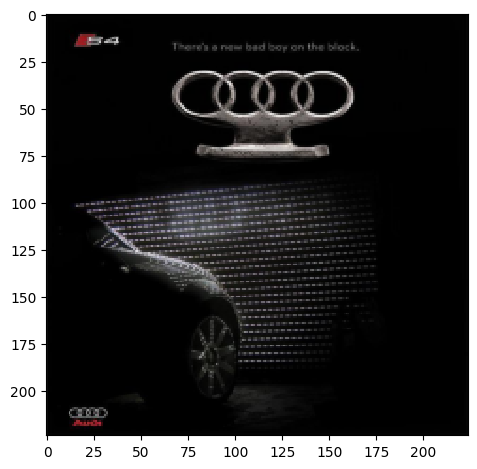

In [ ]:
path = normalpath


X_train = np.zeros((2*len(train_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = []

print('Resizing training images')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    try:
        img = imread(path + 'train_images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
        Y_train.append(allimages[id_+".png"])
    except:
        img = imread(path + 'train_images/' + id_ + '.jpg')[:,:,:IMG_CHANNELS]
        Y_train.append(allimages[id_+".jpg"])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n] = img  #Fill empty X_train with values from img

#ADDING FLIPPED IMAGES FOR DATA AUGMENTATION
print('resizing flipped training images')
for n, id_ in tqdm(enumerate(train_ids), total=len(train_ids)):
    try:
        img = imread(path + 'train_images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
        Y_train.append(allimages[id_+".png"])
    except:
        img = imread(path + 'train_images/' + id_ + '.jpg')[:,:,:IMG_CHANNELS]
        Y_train.append(allimages[id_+".jpg"])
    img = np.fliplr(img)
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_train[n+len(train_ids)] = img  #Fill empty X_train with values from img

# test images
X_test = np.zeros((len(test_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = []
sizes_test = []
print('Resizing test images')
for n, id_ in tqdm(enumerate(test_ids), total=len(test_ids)):
    try:
        img = imread(path + 'train_images/' + id_ + '.png')[:,:,:IMG_CHANNELS]
        Y_test.append(allimages[id_+".png"])
    except:
        img = imread(path + 'train_images/' + id_ + '.jpg')[:,:,:IMG_CHANNELS]
        Y_test.append(allimages[id_+".jpg"])
    sizes_test.append([img.shape[0], img.shape[1]])
    img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
    X_test[n] = img

print('Done!')

image_x = random.randint(0, len(train_ids))
imshow(X_train[image_x])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelBinarizer

# Initialize and fit the binarizer
lb = LabelBinarizer()
lb.fit(Y_train)

# Transform labels into one-hot encoded format
Y_train_onehot = lb.transform(Y_train)
Y_test_onehot = lb.transform(Y_test)

print(Y_train_onehot)


[[1 0 0 0 0 0]
 [1 0 0 0 0 0]
 [1 0 0 0 0 0]
 ...
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]
 [0 0 1 0 0 0]]


In [ ]:
from keras.applications import ResNet50
from keras.applications import VGG16
from keras.applications import VGG19



from keras.models import Model
import keras
input_shape=(IMG_HEIGHT,IMG_WIDTH,3)
# resnet = ResNet50(include_top=False, weights='imagenet', input_shape=input_shape)
resnet = tf.keras.applications.ConvNeXtLarge(input_shape=input_shape, weights='imagenet', include_top=False)
output = resnet.layers[-1].output
output = keras.layers.Flatten()(output)
resnet = Model(resnet.input, outputs=output)
for layer in resnet.layers:
    layer.trainable = False


#Build the model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
from keras.regularizers import l1_l2
regvals = [0.0, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1]






In [ ]:

model = Sequential()
model.add(resnet)




# Continue for other layers as well
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu')) #kernel_regularizer=l1_l2(l1=0.001, l2=0.005)
model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
# model.summary()

history = model.fit(X_train, Y_train_onehot, validation_data=(X_test, Y_test_onehot), epochs=25, batch_size=32, verbose=1)
loss, accuracy = model.evaluate(X_test, Y_test_onehot)
# print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# acc = history.history['val_accuracy']
# average_max_mean = (max(acc) + sum(acc) / len(acc)) / 2








Epoch 1/25
13/13 [==============================] - 65s 3s/step - loss: 3.6129 - accuracy: 0.6019 - val_loss: 2.4210 - val_accuracy: 0.7407
Epoch 2/25
13/13 [==============================] - 16s 1s/step - loss: 0.3091 - accuracy: 0.9417 - val_loss: 2.4652 - val_accuracy: 0.6852
Epoch 3/25
13/13 [==============================] - 16s 1s/step - loss: 0.1085 - accuracy: 0.9733 - val_loss: 2.3843 - val_accuracy: 0.6852
Epoch 4/25
13/13 [==============================] - 16s 1s/step - loss: 0.0467 - accuracy: 0.9854 - val_loss: 2.3520 - val_accuracy: 0.6852
Epoch 5/25
13/13 [==============================] - 16s 1s/step - loss: 0.0314 - accuracy: 0.9879 - val_loss: 2.1849 - val_accuracy: 0.6667
Epoch 6/25
13/13 [==============================] - 16s 1s/step - loss: 0.0156 - accuracy: 0.9927 - val_loss: 2.4439 - val_accuracy: 0.6667
Epoch 7/25
13/13 [==============================] - 16s 1s/step - loss: 0.0134 - accuracy: 0.9927 - val_loss: 2.4980 - val_accuracy: 0.6852
Epoch 8/25
13/13 [==

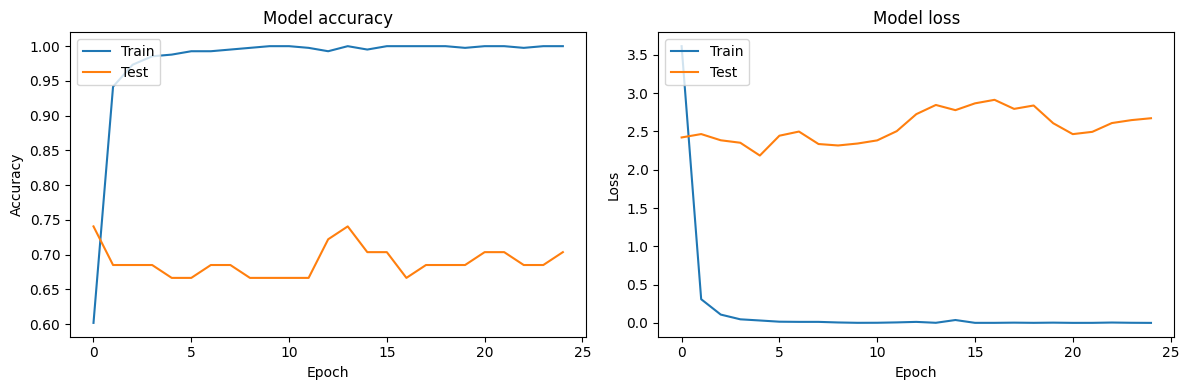

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_cm = np.argmax(Y_test_onehot, axis=1)


2/2 [==============================] - 5s 704ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test_cm, y_pred)
print(cm)

[[ 8  0  0  1  1  0]
 [ 1  7  0  0  1  0]
 [ 2  0  4  2  0  0]
 [ 0  0  0 10  0  0]
 [ 0  0  2  0  3  4]
 [ 0  0  0  0  2  6]]


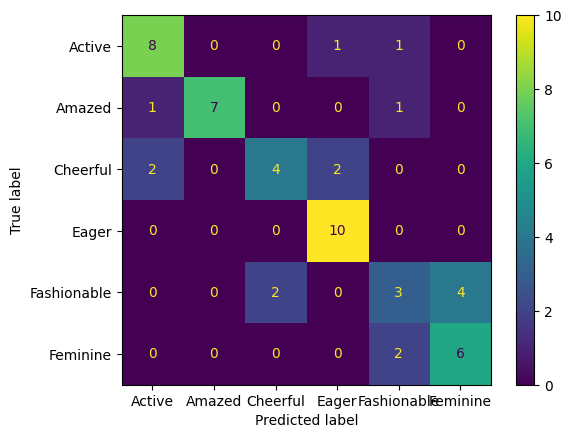

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lb.classes_)
disp.plot()
plt.show()